Body brain weights outliers
---

Exercise: Load an plot the data
---

> **Exercise**: Load the data set into a `data_df` DataFrame. Load the `body` and `brain` columns into x/y Numpy arrays. Apply the Numpy `log()` function to both variables, store the result in a `x_log` and a `y_log` variable, and plot them.

In [51]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import HuberRegressor


# Load data
data_df = pd.read_csv('bodybrain-weights.csv')
x = data_df['body'].values
y = data_df['brain'].values

# Rescale them
x_log = np.log(data_df['body'].values)
y_log = np.log(data_df['brain'].values)

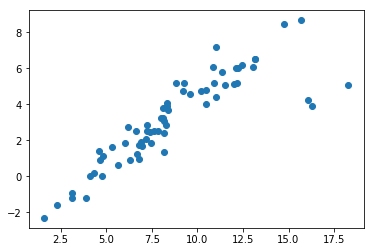

In [5]:
# Plot x_log/y_log
plt.scatter(x_log, y_log);

Exercise: Filter outliers and fit a linear regression
---

> **Exercise**: (A) Fit a linear regression to `x_log` and `y_log`. (B) Filter the three outliers. (C) Fit another linear regression. (D) Visually compare the two models by plotting their prediction lines.

In [16]:
# (A) Fit a linear regression using all the data points
coefs = np.polyfit(x_log, y_log, deg=1)
print('coefs:', coefs)

# (B) Filter the three outliers
idx = ((x_log > 15) & (y_log < 6))


coefs: [ 0.59674426 -1.96962141]


In [39]:
# (C) Fit a linear regression using the rest of the data points
x_log_wo = x_log[~idx]
y_log_wo = y_log[~idx]       
coefs_wo = np.polyfit(x_log_wo, y_log_wo, deg=1)
print('coefs without outliers:', coefs_wo)


coefs without outliers: [ 0.75836799 -3.12333267]


0.7583679939800864

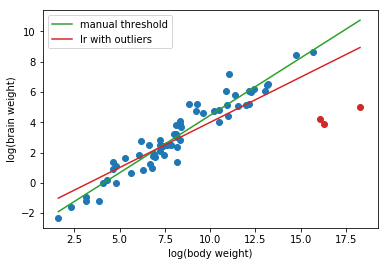

In [22]:
### (D) Plot the two models

x_values = np.linspace(min(x_log), max(x_log), num=100)
y_values = np.polyval(coefs, x_values)
y_values_wo = np.polyval(coefs_wo, x_values)

plt.scatter(x_log_wo, y_log_wo)
plt.scatter(x_log[idx], y_log[idx], c='C3')
plt.plot(x_values, y_values_wo, c='C2', label='manual threshold')
plt.plot(x_values, y_values, c='C3', label='lr with outliers')
plt.xlabel('log(body weight)')
plt.ylabel('log(brain weight)')
plt.legend()
plt.show()

Exercise: Fit a linear regression using Huber loss
---

> **Exercise**: Fit a linear regression to `x_log` and `y_log` using Huber loss. Plot the prediction line.

**Self-assessment**: You should get a result close to the linear regression without outliers.

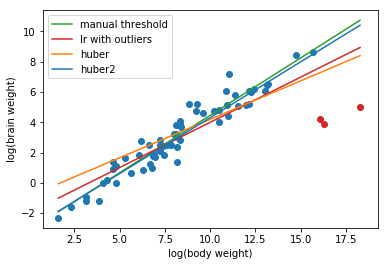

In [55]:
# Fit a linear regression using Huber loss
lr_huber = SGDRegressor(loss='huber', penalty='none', epsilon=0.1, max_iter=10000, tol=1e-6)
lr_huber2 = HuberRegressor(epsilon=1.1)
# Fit the model
lr_huber.fit(x_log[:, np.newaxis], y_log);
lr_huber2.fit(x_log[:, np.newaxis], y_log)
y_values_huber = lr_huber.predict(x_values[:, np.newaxis])
y_values_huber2 = lr_huber2.predict(x_values[:, np.newaxis])

# Plot the prediction line

plt.scatter(x_log_wo, y_log_wo)
plt.scatter(x_log[idx], y_log[idx], c='C3')
plt.plot(x_values, y_values_wo, c='C2', label='manual threshold')
plt.plot(x_values, y_values, c='C3', label='lr with outliers')
plt.plot(x_values, y_values_huber, c='C1', label='huber')
plt.plot(x_values, y_values_huber2, c='C0', label='huber2')
plt.xlabel('log(body weight)')
plt.ylabel('log(brain weight)')
plt.legend()
plt.show()

Exercise: Compute the *Encephalization Quotient (EQ)*
---

We saw that the equation of a simple linear regression for variables on a logarithmic scale: $\log\left(y\right)=a\log\left(x\right)+b$ is equivalent to $y=cx^{a}$ where $c=e^{b}$. In our example, we can use this equation to calculate the **Encephalization Quotient (EQ)**.

The idea is to compute estimations of brain weights for each data point using $\hat{y}=cx^{a}$ and compare them to the actual brain weights. The EQ coefficient is defined as

$$
\text{EQ}=\frac{y}{\hat{y}}
$$

> **Exercise**: (A) Create the `a` and `c` values using the coefficients of the linear regression model without outliers. (B) Compute the estimated brain weights $\hat{y}$. (C) Compute the EQ values and add them to the `data_df` DataFrame. (D) Print the five rows with the largest quotients.

**Self-assessment**: You should see humans and monkeys in the first places - humans with an EQ around 7.

In [54]:
# (A) Create a and c values
a = coefs_wo[0]
c = np.exp(coefs_wo[1])

# (B) Compute predicted brain weights
y_pred = c * x ** a

# (C) Compute EQ
data_df['EQ'] = y / y_pred

# (D) Print the five largest quotients
data_df[['label','EQ']].sort_values(by = ['EQ'], ascending = False).head(5)

,label,EQ
48,Human,6.960230
57,Rhesus monkey,5.044836
26,Baboon,3.625807
22,Owl monkey,3.261447
21,Ground squirrel,2.744688
